In [1]:
from typing import TypedDict # Imports all the data types we need
from langgraph.graph import StateGraph , START , END


# %%
class AgentState(TypedDict):
    number1: int
    number2: int
    final: str
    operation:str
    result:str



In [2]:
def subtract_node(state:AgentState) -> AgentState:
    """This is sub node"""
    state["final"] = state["number1"] - state["number2"]
    return state

    

def add_node(state:AgentState) -> AgentState:
    """This is the add node of our sequence"""

    state["final"] = state["number1"] + state["number2"]
    return state
  
def decide_next(state:AgentState):
  if(state["operation"] == '+'):
    return "add"
  else:
    return "subtract"


In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node" , add_node)
graph.add_node("subtract_node" , subtract_node)
graph.add_conditional_edges(START , decide_next ,{
  "add":"add_node",
  "subtract":"subtract_node"
})
graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)



app = graph.compile()



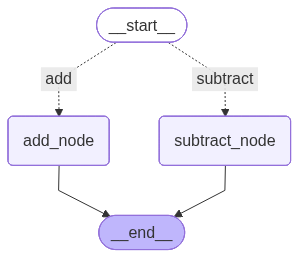

{'number1': 2, 'number2': 3, 'final': -1, 'operation': '-'}


In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

# %%
result = app.invoke({"number1":2,"number2":3,"operation":"-"})

# %%
print(result)